In [1]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns

%matplotlib inline

### 4.	Using the pandas `read_csv()` method, read the GDP dataset into your notebook as a DataFrame called `gdp_df`. Take a look at the first few and last few rows to familiarize yourself with what is contained in this dataset.

In [41]:
internet_df = pd.read_csv(r"C:\Users\Diarra\Documents\Analytics\DDA9\Python\projects\gdp_and_internet_usage-diarra-fall\data\gdp_percapita.csv") #reads gdp dataset and stores to gdp_df

In [42]:
gdp_df.head() #displays first 5 rows

,Country,Year,GDP_Per_Capita
0,Afghanistan,2020,1970.560169
1,Afghanistan,2019,2065.036235
2,Afghanistan,2018,2033.804389
3,Afghanistan,2017,2058.400221
4,Afghanistan,2016,2057.067978


In [4]:
gdp_df.tail() #displays last 5 rows

,Country or Area,Year,Value,Value Footnotes
7171,Zimbabwe,1994,2603.927369,NaN
7172,Zimbabwe,1993,2420.092791,NaN
7173,Zimbabwe,1992,2437.152908,NaN
7174,Zimbabwe,1991,2733.696626,NaN
7175,Zimbabwe,1990,2652.129209,NaN


### 5. How many rows and columns are in `gdp_df`? What are the data types of each column?

In [5]:
gdp_df.shape #returns the count of columns and rows
#there are 7,176 rows and 4 columns in gdp_df

(7176, 4)

In [6]:
gdp_df.info() #returns information about the contents of the dataframe

#  #   Column           Non-Null Count  Dtype  
# ---  ------           --------------  -----  
#  0   Country or Area  7176 non-null   object 
#  1   Year             7176 non-null   int64  
#  2   Value            7176 non-null   float64
#  3   Value Footnotes  0 non-null      float64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7176 entries, 0 to 7175
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country or Area  7176 non-null   object 
 1   Year             7176 non-null   int64  
 2   Value            7176 non-null   float64
 3   Value Footnotes  0 non-null      float64
dtypes: float64(2), int64(1), object(1)
memory usage: 224.4+ KB


### 6. Drop the `Value Footnotes` column and rename the remaining three to 'Country', 'Year', and 'GDP_Per_Capita'.

In [7]:
gdp_df = gdp_df.drop(columns = 'Value Footnotes').rename(columns = {'Country or Area': 'Country', 'Value': 'GDP_Per_Capita'}) #removes the specified column and renames the remaining ones     

### 7. How many countries have data for all years? Which countries are missing many years of data? Look at the number of observations per year. What do you notice? 

In [8]:
gdp_df.Year.nunique() #counts how many unique years in dataframe

31

In [9]:
all_years = gdp_df.Country.value_counts() == 31 #counts how many countries in total
all_years.value_counts() #displays how many countries have all years and how many are missing years

# 205 countries have data for all years

True     205
False     37
Name: Country, dtype: int64

In [10]:
missing_years = gdp_df.Country.value_counts() <= 26 # sorts countries depending on whether they have 26 years or fewer (missing at least 5 years)
missing_years = missing_years.to_frame().reset_index() #converts this to a dataframe and resets the index
missing_years = missing_years.loc[missing_years.Country == True] #filters on first condition (to only those missing many)
missing_years

,index,Country
211,Slovenia,True
212,Latvia,True
213,Israel,True
214,Lithuania,True
215,Serbia,True
216,Moldova,True
217,Iceland,True
218,Croatia,True
219,Estonia,True
220,Kuwait,True


In [11]:
gdp_df.Year.value_counts() #shows number of observations per year - the number of observations has been increasing with time

2018    242
2017    242
2016    242
2015    242
2014    242
2013    242
2019    241
2020    240
2012    240
2011    240
2010    239
2009    239
2008    238
2007    237
2006    237
2004    236
2005    236
2003    235
2002    235
2001    234
2000    233
1999    227
1998    226
1997    226
1996    222
1995    222
1994    211
1993    209
1992    208
1991    207
1990    206
Name: Year, dtype: int64

### 8. In this question, you're going to create some plots to show the distribution of GDP per capita for the year 2020. Go to the Python Graph Gallery (https://www.python-graph-gallery.com/) and look at the different types of plots under the Distribution section. Create a histogram, a density plot, a boxplot, and a violin plot. What do you notice when you look at these plots? How do the plots compare and what information can you get out of one type that you can't necessarily get out of the others?

<AxesSubplot:xlabel='GDP_Per_Capita', ylabel='Count'>

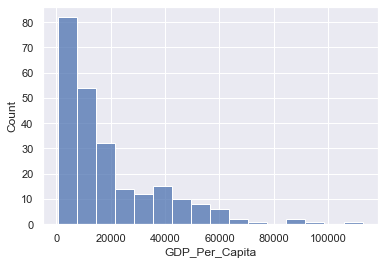

In [12]:
#histogram
sns.set(style="darkgrid")
sns.histplot(data=gdp_df.loc[gdp_df.Year == 2020], x="GDP_Per_Capita")
#the histogram gives you a clearer idea of the frequency 

<AxesSubplot:xlabel='GDP_Per_Capita', ylabel='Density'>

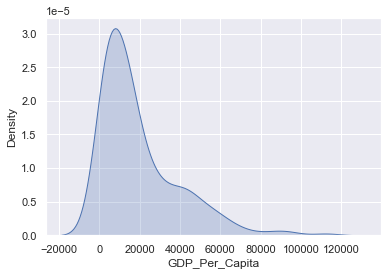

In [13]:
#density
sns.set(style="darkgrid")
sns.kdeplot(gdp_df.loc[gdp_df.Year == 2020, 'GDP_Per_Capita'], shade=True)

<AxesSubplot:ylabel='GDP_Per_Capita'>

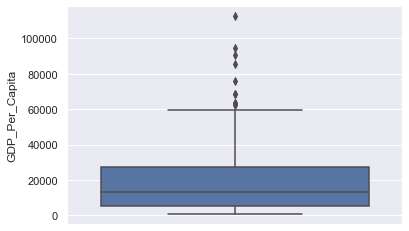

In [14]:
#boxplot
sns.set(style="darkgrid")
sns.boxplot(y=gdp_df.loc[gdp_df.Year == 2020, 'GDP_Per_Capita'])

<AxesSubplot:ylabel='GDP_Per_Capita'>

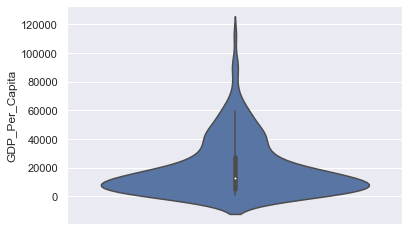

In [15]:
#violin plot
sns.set(style="darkgrid")
sns.violinplot(y=gdp_df.loc[gdp_df.Year == 2020, 'GDP_Per_Capita'])

### 9. What was the median GDP per capita value in 2020?

In [16]:
gdp_df.loc[gdp_df.Year == 2020, 'GDP_Per_Capita'].describe() #retrieves various statistics from the masked dataset

count       240.000000
mean      19496.881712
std       19586.817493
min         731.064074
25%        4945.083068
50%       12908.937406
75%       27196.648661
max      112557.309472
Name: GDP_Per_Capita, dtype: float64

In [17]:
from statistics import median
median(gdp_df.loc[gdp_df.Year == 2020, 'GDP_Per_Capita']) #calculated the median from the masked dataset

12908.9374056206

In [18]:
# median = 12908.94

### 10. For this question, you're going to create some visualizations to compare GDP per capita values for the years 1990, 2000, 2010, and 2020. Start by subsetting your data to just these 4 years into a new DataFrame named gdp_decades. Using this, create the following 4 plots:
	* A boxplot
	* A barplot (check out the Barplot with Seaborn section: https://www.python-graph-gallery.com/barplot/#Seaborn)
	* A scatterplot
	* A scatterplot with a trend line overlaid (see this regplot example: https://www.python-graph-gallery.com/42-custom-linear-regression-fit-seaborn)  
### Comment on what you observe has happened to GDP values over time and the relative strengths and weaknesses of each type of plot.

In [19]:
decades = [1990, 2000, 2010, 2020]
gdp_decades = gdp_df.loc[gdp_df.Year.isin(decades)]
gdp_decades

,Country,Year,GDP_Per_Capita
0,Afghanistan,2020,1970.560169
10,Afghanistan,2010,1957.029070
19,Africa Eastern and Southern,2020,3491.978104
29,Africa Eastern and Southern,2010,3545.205203
39,Africa Eastern and Southern,2000,2915.472987
...,...,...,...
7144,Zambia,1990,2190.181724
7145,Zimbabwe,2020,2134.555461
7155,Zimbabwe,2010,1813.531764
7165,Zimbabwe,2000,2771.060576


<AxesSubplot:xlabel='Year', ylabel='GDP_Per_Capita'>

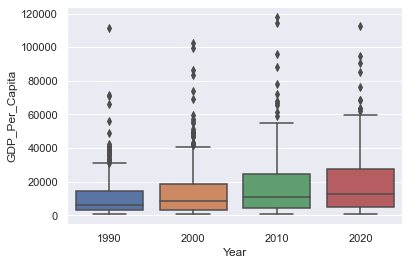

In [20]:
# A boxplot
sns.set(style="darkgrid")
sns.boxplot(y=gdp_decades.GDP_Per_Capita, x=gdp_decades.Year)

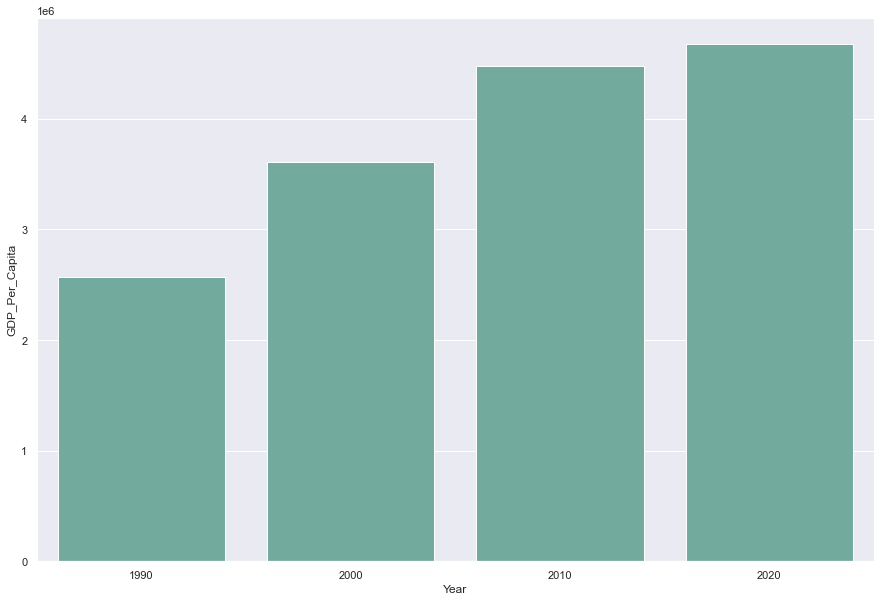

In [21]:
# A barplot (check out the Barplot with Seaborn section: https://www.python-graph-gallery.com/barplot/#Seaborn)
sns.set(style="darkgrid")
# Set the figure size
plt.figure(figsize=(15, 10))
# plot a bar chart
sns.barplot(
    x="Year", 
    y="GDP_Per_Capita", 
    data=gdp_decades, 
    estimator=sum, 
    ci=None, 
    color='#69b3a2');

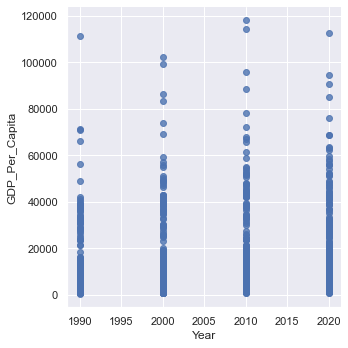

In [22]:
# A scatterplot
# Use the 'hue' argument to provide a factor variable
sns.lmplot( x="Year", y="GDP_Per_Capita", data=gdp_decades, fit_reg=False, legend=False)

<AxesSubplot:xlabel='Year', ylabel='GDP_Per_Capita'>

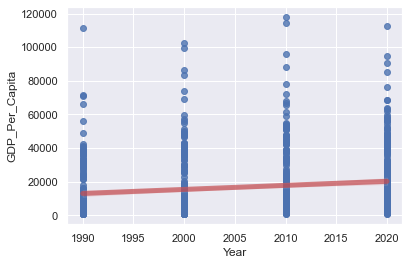

In [23]:
# A scatterplot with a trend line overlaid (see this regplot example: https://www.python-graph-gallery.com/42-custom-linear-regression-fit-seaborn) 
sns.regplot(x=gdp_decades.Year, y=gdp_decades.GDP_Per_Capita, line_kws={"color":"r","alpha":0.7,"lw":5})

### 11. Which country was the first to have a GDP per capita greater than $100,000?

In [24]:
high_gdp = gdp_df.loc[gdp_df.GDP_Per_Capita > 100000] #filters for rows with gdp higher than 100000

In [25]:
first_high_gdp = high_gdp[high_gdp.Year == high_gdp.Year.min()] #filters for the country with the earliest year: UAE
print(first_high_gdp)

                   Country  Year  GDP_Per_Capita
6838  United Arab Emirates  1990   111454.055665


### 12. Which country had the highest GDP per capita in 2020? Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset.

In [26]:
gdp_2020 = gdp_df.loc[gdp_df.Year == 2020] #filters for rows the year 2020

In [27]:
high_gdp_2020 = gdp_2020[gdp_2020.GDP_Per_Capita == gdp_2020.GDP_Per_Capita.max()] #filters for the country with the highest gdp/capita: Luxembourg
print(high_gdp_2020)

         Country  Year  GDP_Per_Capita
3882  Luxembourg  2020   112557.309472


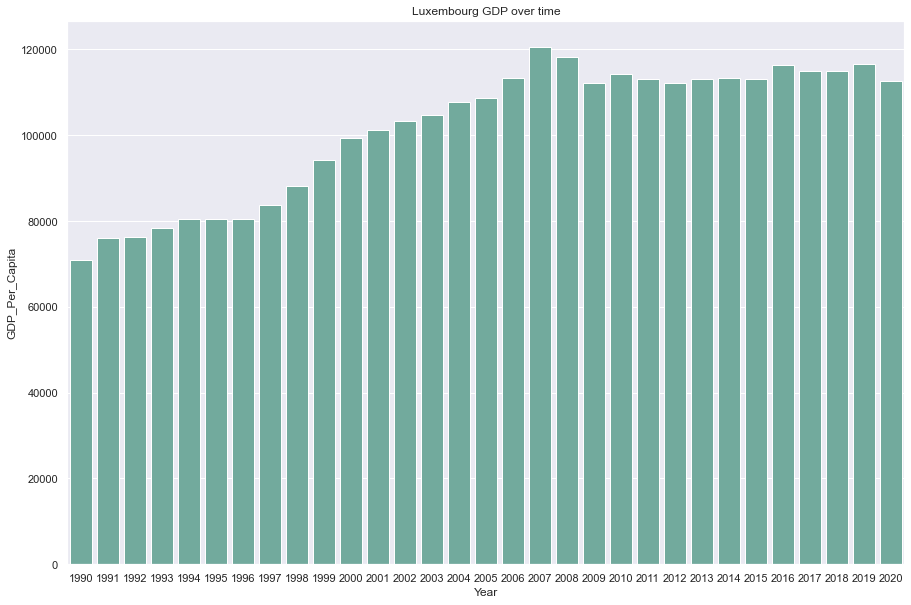

In [28]:
sns.set(style="darkgrid")
plt.figure(figsize=(15, 10))
sns.barplot(
    x="Year", 
    y="GDP_Per_Capita", 
    data=gdp_df.loc[gdp_df.Country == 'Luxembourg'], 
    estimator=sum, 
    ci=None, 
    color='#69b3a2').set_title("Luxembourg GDP over time");

### 13. Which country had the lowest GDP per capita in 2020? Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset. 
### ***Bonus question:** Is it true in general that coutries had a higher GDP per capita in 2020 than in 1990? Which countries had lower GDP per capita in 2020 than in 1990?*

In [29]:
low_gdp_2020 = gdp_2020[gdp_2020.GDP_Per_Capita == gdp_2020.GDP_Per_Capita.min()] #filters for the country with the lowest gdp/capita: Burundi
print(low_gdp_2020)

     Country  Year  GDP_Per_Capita
914  Burundi  2020      731.064074


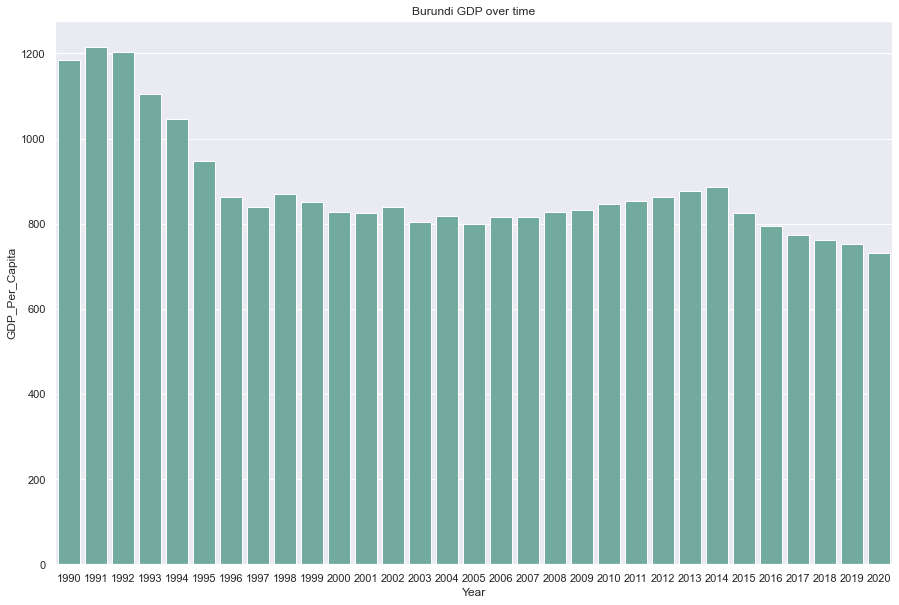

In [30]:
sns.set(style="darkgrid")
plt.figure(figsize=(15, 10))
sns.barplot(
    x="Year", 
    y="GDP_Per_Capita", 
    data=gdp_df.loc[gdp_df.Country == 'Burundi'], 
    estimator=sum, 
    ci=None, 
    color='#69b3a2').set_title("Burundi GDP over time");

In [31]:
short_decades = [1990, 2020]
gdp_short_decades = gdp_df.loc[gdp_df.Year.isin(short_decades)] #filter to only return values from 1990 and 2020

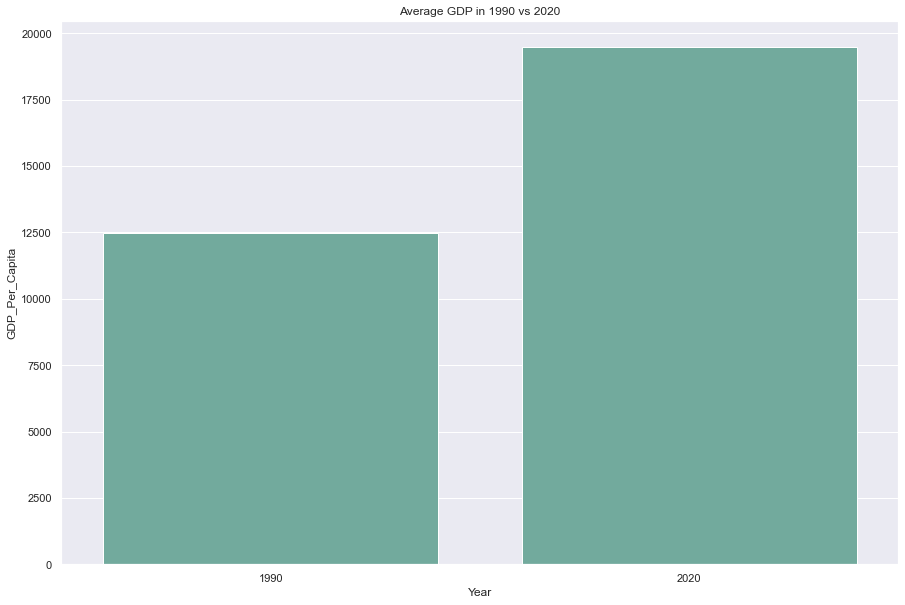

In [35]:
sns.set(style="darkgrid")
plt.figure(figsize=(15, 10))
sns.barplot(
    x="Year", 
    y="GDP_Per_Capita", 
    data=gdp_short_decades, 
    estimator=np.mean, #shows the average gdp value rather than sum
    ci=None, 
    color='#69b3a2').set_title("Average GDP in 1990 vs 2020");
#On average, gdp has risen between 1990 and 2020

In [36]:
gdp_1990 = gdp_df.loc[gdp_df.Year == 1990] #filter to only return values from 1990 and 2020

In [37]:
gdp_2020 = gdp_df.loc[gdp_df.Year == 2020] #filter to only return values from 1990 and 2020

In [119]:
gdp_comp = pd.merge(gdp_1990, gdp_2020, 
                               left_on = ['Country'], right_on = ['Country'], 
                               how = 'outer')
gdp_comp

,Country,Year_x,GDP_Per_Capita_x,Year_y,GDP_Per_Capita_y
0,Africa Eastern and Southern,1990.0,3083.976800,2020.0,3491.978104
1,Africa Western and Central,1990.0,2810.341129,2020.0,4021.293919
2,Albania,1990.0,4827.034551,2020.0,13253.733337
3,Algeria,1990.0,8746.340762,2020.0,10735.382539
4,Angola,1990.0,5758.950488,2020.0,6141.963839
...,...,...,...,...,...
236,Small states,NaN,NaN,2020.0,19138.144156
237,Somalia,NaN,NaN,2020.0,1180.965971
238,Timor-Leste,NaN,NaN,2020.0,3925.948159
239,Turks and Caicos Islands,NaN,NaN,2020.0,21126.947848


In [121]:
gdp_comp.loc[gdp_comp.GDP_Per_Capita_y < gdp_comp.GDP_Per_Capita_x].Country
#9                                         Aruba
#15                                     Barbados
#25                                       Brunei
#28                                      Burundi
#33                     Central African Republic
#39                                      Comoros
#40                                        Congo
#44                              Dem. Rep. Congo
#65     Fragile and conflict affected situations
#67                                        Gabon
#75                                Guinea-Bissau
#77                                        Haiti
#98                                     Kiribati
#100                             Kyrgyz Republic
#114                                  Madagascar
#143                                        Oman
#182                                  Tajikistan
#185                                 The Bahamas
#186                                  The Gambia
#194                                     Ukraine
#195                        United Arab Emirates
#205                                    Zimbabwe

9                                         Aruba
15                                     Barbados
25                                       Brunei
28                                      Burundi
33                     Central African Republic
39                                      Comoros
40                                        Congo
44                              Dem. Rep. Congo
65     Fragile and conflict affected situations
67                                        Gabon
75                                Guinea-Bissau
77                                        Haiti
98                                     Kiribati
100                             Kyrgyz Republic
114                                  Madagascar
143                                        Oman
182                                  Tajikistan
185                                 The Bahamas
186                                  The Gambia
194                                     Ukraine
195                        United Arab E

### 14. Read in the internet use dataset into a DataFrame named `internet_df`. You will likely get errors when doing this. Check the arguments for the read_csv function to find ones that can help correct the errors (https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) Once you are able to read it in, take per a look at the top and bottom few rows to make sure that it has been read in correctly. Also, check the datatypes of the columns.

In [52]:
internet_df = pd.read_csv(r"C:\Users\Diarra\Documents\Analytics\DDA9\Python\projects\gdp_and_internet_usage-diarra-fall\data\internet_use.csv", nrows = 4495) #reads 4495 rows of internet_use dataset dataset and stores to internet_df

In [53]:
internet_df

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2014,6.390000,NaN
1,Afghanistan,2013,5.900000,NaN
2,Afghanistan,2012,5.454545,NaN
3,Afghanistan,2011,5.000000,NaN
4,Afghanistan,2010,4.000000,NaN
...,...,...,...,...
4490,Zimbabwe,1997,0.033080,NaN
4491,Zimbabwe,1996,0.016790,NaN
4492,Zimbabwe,1995,0.007684,NaN
4493,Zimbabwe,1994,0.001739,NaN


In [54]:
internet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4495 entries, 0 to 4494
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country or Area  4495 non-null   object 
 1   Year             4495 non-null   int64  
 2   Value            4495 non-null   float64
 3   Value Footnotes  948 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 140.6+ KB


### 15. Drop the `Value Footnotes` column and rename the remaining three to 'Country', 'Year', and 'Internet_Users_Pct'.

In [55]:
internet_df = internet_df.drop(columns = 'Value Footnotes').rename(columns = {'Country or Area': 'Country', 'Value': 'Internet_Users_Pct'}) #removes the specified column and renames the remaining ones     

### 16. Look at the number of observations in this dataset per year. What do you notice?

In [56]:
internet_df.Year.value_counts() #shows observations/year
#There are fewer countries in this dataset and there are different years

1990    210
2011    207
2007    206
2008    204
2012    203
2010    203
2009    203
2014    202
2013    202
2002    202
2005    201
2001    201
2006    200
2000    199
2004    199
1999    198
2003    196
1998    190
1997    184
1996    175
1995    138
1994     91
1993     65
1992     50
1991     39
1989      8
1980      7
1965      7
1970      7
1975      7
1976      7
1977      7
1978      7
1979      7
1982      7
1981      7
1983      7
1984      7
1985      7
1986      7
1987      7
1988      7
1960      7
Name: Year, dtype: int64

### 17. What is the first year to have a non-zero internet users percentage value?

In [57]:
non_zero = internet_df.loc[internet_df.Internet_Users_Pct > 0 ] #filters for non-zero percentages

In [59]:
non_zero_first = non_zero[non_zero.Year == non_zero.Year.min()] #filters for the earliest year with non-zero perc: 1990
print(non_zero_first)

              Country  Year  Internet_Users_Pct
204         Australia  1990            0.585095
229           Austria  1990            0.130369
375           Belgium  1990            0.001007
728            Canada  1990            0.361000
1107          Denmark  1990            0.097277
1388          Finland  1990            0.401088
1413           France  1990            0.052778
1535          Germany  1990            0.125892
2023           Israel  1990            0.110774
2048            Italy  1990            0.017545
2095            Japan  1990            0.020294
2217  Korea (Rep. of)  1990            0.023265
2904      Netherlands  1990            0.334387
3040           Norway  1990            0.707299
3720            Spain  1990            0.012874
3849           Sweden  1990            0.584192
3874      Switzerland  1990            0.595714
4276   United Kingdom  1990            0.087355
4301    United States  1990            0.784729


### 18. How does the distribution of internet users percent differ for 2000 and 2014?

In [63]:
perc_2000 = internet_df.loc[internet_df.Year == 2000 ] #filter rows for year 2000

,Country,Year,Internet_Users_Pct
29,Albania,2000,0.114097
50,Algeria,2000,0.491706
72,Andorra,2000,10.538836
92,Angola,2000,0.105046
112,Antigua and Barbuda,2000,6.482226
...,...,...,...
4403,Viet Nam,2000,0.254248
4423,Virgin Islands (U.S.),2000,13.815081
4445,Yemen,2000,0.082500
4465,Zambia,2000,0.191072


In [62]:
perc_2014 = internet_df.loc[internet_df.Year == 2014 ] #filter rows for year 2014

Text(0.5, 1.0, 'Distribution of Internet Usage Percentage')

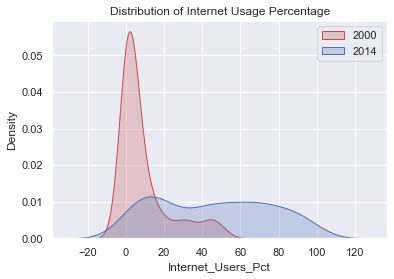

In [72]:
sns.set(style="darkgrid") 
# plotting both distibutions on the same figure
fig = sns.kdeplot(perc_2000['Internet_Users_Pct'], shade=True, color="r")
fig = sns.kdeplot(perc_2014['Internet_Users_Pct'], shade=True, color="b")
fig.legend(labels=['2000','2014'])
fig.set_title("Distribution of Internet Usage Percentage")

In [ ]:
#There are far more countries with higher usage rates in 2014

### 19. For how many countries was the percentage of internet users below 5% in 2014?

In [79]:
under5_2014 = perc_2014.loc[perc_2014.Internet_Users_Pct < 5] #filters the 2014 data for countries with usage under 5%
under5_2014.shape
# 16 countries

(16, 3)

### 20. Merge the two DataFrames to one. Do this in a way that keeps **all rows** from each of the two DataFrames. Call the new DataFrame `gdp_and_internet_use`. Look at the first and last few rows to confirm that it merged correctly.

In [87]:
gdp_and_internet_use = pd.merge(gdp_df, internet_df, 
                               left_on = ['Country', 'Year'], right_on = ['Country', 'Year'], 
                               how = 'outer') # merge the two datasets on country and year - outer join to keep all entries
gdp_and_internet_use

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
0,Afghanistan,2020,1970.560169,NaN
1,Afghanistan,2019,2065.036235,NaN
2,Afghanistan,2018,2033.804389,NaN
3,Afghanistan,2017,2058.400221,NaN
4,Afghanistan,2016,2057.067978,NaN
...,...,...,...,...
8251,Yemen,1999,NaN,0.056629
8252,Yemen,1998,NaN,0.023323
8253,Yemen,1997,NaN,0.015025
8254,Yemen,1996,NaN,0.000621


### 21. Find the three countries with the highest internet users percentage in 2014. Use a seaborn FacetGrid (https://seaborn.pydata.org/generated/seaborn.FacetGrid.html) to compare how the GDP per capita has changed over time for these three countries. What do you notice?

In [95]:
top3_perc_2014 = gdp_and_internet_use.loc[gdp_and_internet_use.Year == 2014].sort_values(by = 'Internet_Users_Pct', ascending = False).head(3) #displays the 3 entries with the highest internet usage in 2014
print(top3_perc_2014)
# Iceland, Bermuda, Norway

      Country  Year  GDP_Per_Capita  Internet_Users_Pct
2803  Iceland  2014    50450.741612               98.16
645   Bermuda  2014    77361.104881               96.80
4880   Norway  2014    62390.130313               96.30


In [123]:
top3_gdp = gdp_and_internet_use.loc[gdp_and_internet_use.Country.isin(top3_perc_2014.Country)] #pulls all data about top 3 countries

<AxesSubplot:xlabel='Year', ylabel='GDP_Per_Capita'>

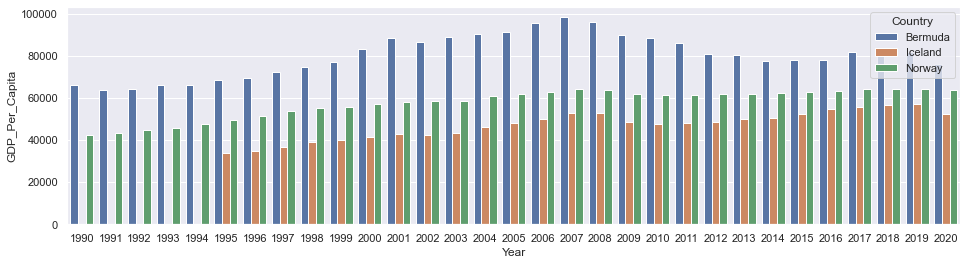

In [132]:
plt.figure(figsize=(16,4))
sns.barplot(data=top3_gdp, x="Year", y="GDP_Per_Capita", hue = "Country") #alternate barplot



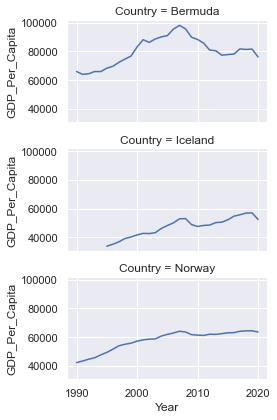

In [167]:
g = sns.FacetGrid(top3_gdp, row="Country", height=2, aspect=2)
g.map(sns.lineplot, "Year", "GDP_Per_Capita") #produces 3 lineplots showing gpd/capita over time for each of the top 3 countries

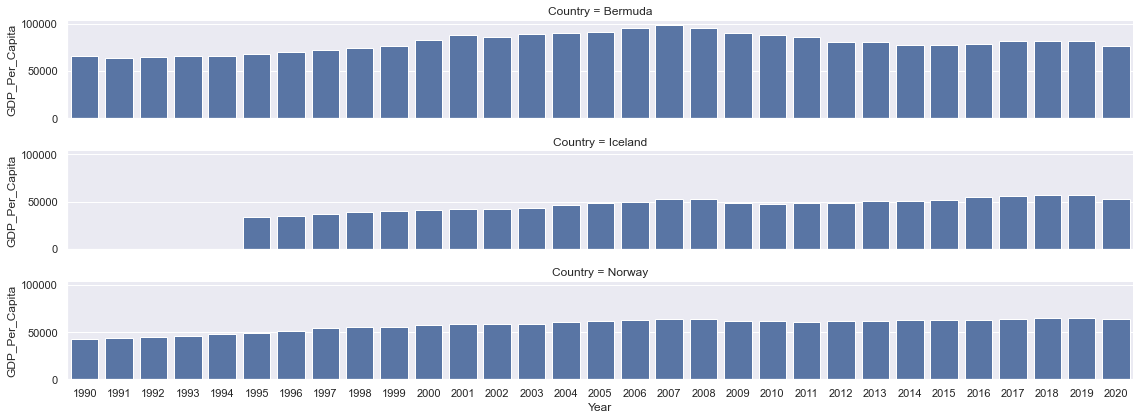

In [171]:
srt = top3_gdp.sort_values('Year').Year.unique() #saves each year listed in ascending order
g = sns.FacetGrid(top3_gdp, row="Country", height=2, aspect=8)
g.map(sns.barplot, "Year", "GDP_Per_Capita", order = srt) #produces 3 barplots showing gpd/capita over time for each of the top 3 countries

### 22. Subset `gdp_and_internet_use` to just the year 2014. Save this as a new dataframe named `gdp_and_internet_use_2014`.

In [172]:
gdp_and_internet_use_2014 = gdp_and_internet_use.loc[gdp_and_internet_use.Year == 2014] #filters to only show 2014 data
gdp_and_internet_use_2014

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
6,Afghanistan,2014,2102.384604,6.39
25,Africa Eastern and Southern,2014,3677.319414,NaN
56,Africa Western and Central,2014,4215.646000,NaN
87,Albania,2014,11586.833878,60.10
118,Algeria,2014,11512.690472,18.09
...,...,...,...,...
8147,Turkey,2014,NaN,51.04
8170,Venezuela,2014,NaN,57.00
8194,Viet Nam,2014,NaN,48.31
8214,Virgin Islands (U.S.),2014,NaN,50.07


### 23. Create a plot which compares Internet Users Percentage and GDP per Capita for the year 2014. What do you notice from this plot? If you see any unusual points, investigate them.

<AxesSubplot:xlabel='Internet_Users_Pct', ylabel='GDP_Per_Capita'>

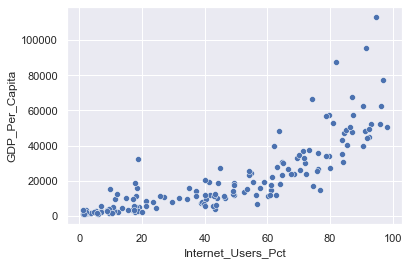

In [175]:
sns.scatterplot(data=gdp_and_internet_use_2014, x="Internet_Users_Pct", y="GDP_Per_Capita")

### 24. **Stretch Question:** Use the `qcut` function from pandas (https://pandas.pydata.org/docs/reference/api/pandas.qcut.html) to divide countries in `gdp_per_capita_2014` into three groups based on their GDP per capita values. Label these groups as "Low", "Medium", and "High". Put these labels in a new column, named "GDP_group".

In [178]:
gdp_and_internet_use_2014['GDP_group'] = pd.qcut(gdp_and_internet_use_2014.GDP_Per_Capita, 3, labels=["Low", "Medium", "High"])
gdp_and_internet_use_2014

C:\Users\Diarra\AppData\Local\Temp\ipykernel_23060\195139738.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdp_and_internet_use_2014['GDP_group'] = pd.qcut(gdp_and_internet_use_2014.GDP_Per_Capita, 3, labels=["Low", "Medium", "High"])


,Country,Year,GDP_Per_Capita,Internet_Users_Pct,GDP_group
6,Afghanistan,2014,2102.384604,6.39,Low
25,Africa Eastern and Southern,2014,3677.319414,NaN,Low
56,Africa Western and Central,2014,4215.646000,NaN,Low
87,Albania,2014,11586.833878,60.10,Medium
118,Algeria,2014,11512.690472,18.09,Medium
...,...,...,...,...,...
8147,Turkey,2014,NaN,51.04,NaN
8170,Venezuela,2014,NaN,57.00,NaN
8194,Viet Nam,2014,NaN,48.31,NaN
8214,Virgin Islands (U.S.),2014,NaN,50.07,NaN


### 25. **Stretch Question:** How does the median internet users percentage compare for the three gdp groups?

In [183]:
med_low = gdp_and_internet_use_2014.loc[gdp_and_internet_use_2014.GDP_group == "Low"].Internet_Users_Pct.median()
med_med = gdp_and_internet_use_2014.loc[gdp_and_internet_use_2014.GDP_group == "Medium"].Internet_Users_Pct.median()
med_high = gdp_and_internet_use_2014.loc[gdp_and_internet_use_2014.GDP_group == "High"].Internet_Users_Pct.median()

print("Low: ", med_low, " Medium: ", med_med, " High: ", med_high)

Low:  10.6  Medium:  43.0  High:  78.74000000000001


### Bonus exercise:
1.    Download another data set from the UN data (http://data.un.org/Explorer.aspx) to merge with your data and explore.